# 911 Calls - Data Analysis

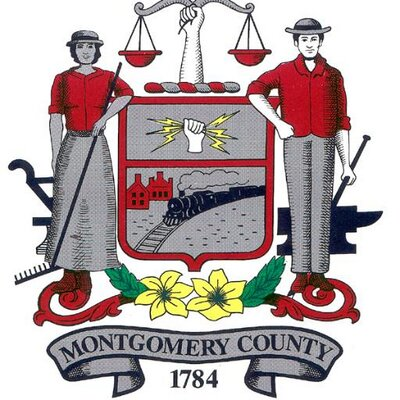

- The purpose of this project is to provide a brief data analysis of a 911 calls dataset.
- The dataset contains emergency calls data from Montgomery County, Pennsylvania and is available on [Kaggle][1]

[1]: https://www.kaggle.com/mchirico/montcoalert

## Setup

In [1]:
# Importing the main libraries
import numpy as np
import pandas as pd

# Notebook settings
%matplotlib inline

# Importing data visualization libraries
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Data visualization settings
sns.set_style("darkgrid")

## Dataset Overview

In [2]:
# Loading the dataset
df = pd.read_csv('data/911.csv')

In [3]:
# Checking the dataset variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633701 entries, 0 to 633700
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        633701 non-null  float64
 1   lng        633701 non-null  float64
 2   desc       633701 non-null  object 
 3   zip        556677 non-null  float64
 4   title      633701 non-null  object 
 5   timeStamp  633701 non-null  object 
 6   twp        633430 non-null  object 
 7   addr       633701 non-null  object 
 8   e          633701 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.5+ MB


In [4]:
# Viewing a sample of the dataset
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [5]:
# Showing min and max dates
print(df['timeStamp'].min())
print(df['timeStamp'].max())

2015-12-10 14:39:21
2020-05-04 13:43:59


The dataset has 633701 rows, each one representing a call, from December 2015 to May 2020.
It contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

From this initial analysis, the dataset information can be resumed in three aspects:

- Call reason
- Call time
- Call location

From this aspects, we can formulate some questions that we will investigate further:

1. What are the most common reasons for a 911 call?
2. How are the calls distributed in time?
3. How are the calls distributed geographically? 


## Exploratory Data Analysis

In [6]:
# The reason for the call is represented by the title column, composed by a category and a subcategory
# Therefore, we will begin by splitting this column into two new columns
df['Category'] = df['title'].apply(lambda x: x.split(': ')[0])
df['Subcategory'] = df['title'].apply(lambda x: x.split(': ')[1])

In [7]:
# Checking the new columns in the dataset
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e Category         Subcategory  
0      REINDEER CT & DEAD END  1      EMS   BACK PAINS/INJURY  
1  BRIAR PATH & WHITEMARSH LN  1      EMS  DIABETIC EMERGENCY  
2                    HAWS AVE  1     Fire       GAS-ODOR/LEAK  
3          AIRY ST & SWEDE ST  1      EMS   CARDIAC EMERGENCY  
4    CHERRYWOOD CT & DEAD END  1      EMS           DIZZINESS

In [8]:
# Now, we can investigate the most common reasons for a call
# First, we will see how the calls are distributed by category
df['Category'].value_counts()

EMS        316715
Traffic    221933
Fire        95053
Name: Category, dtype: int64

Text(0, 0.5, 'Number of Calls')

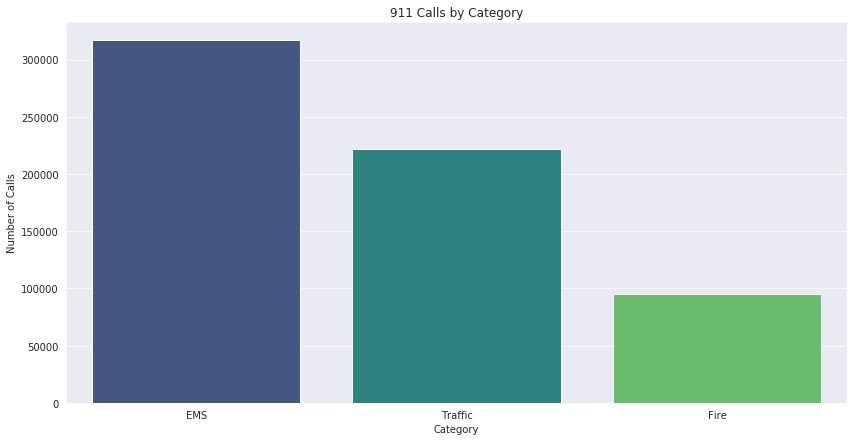

In [9]:
# In order to better visualize, we can plot the above information
plt.figure(figsize=(14,7))

sns.countplot(x="Category", data=df, palette='viridis', order=df['Category'].value_counts().index)

plt.title('911 Calls by Category')
plt.xlabel('Category')
plt.ylabel('Number of Calls')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

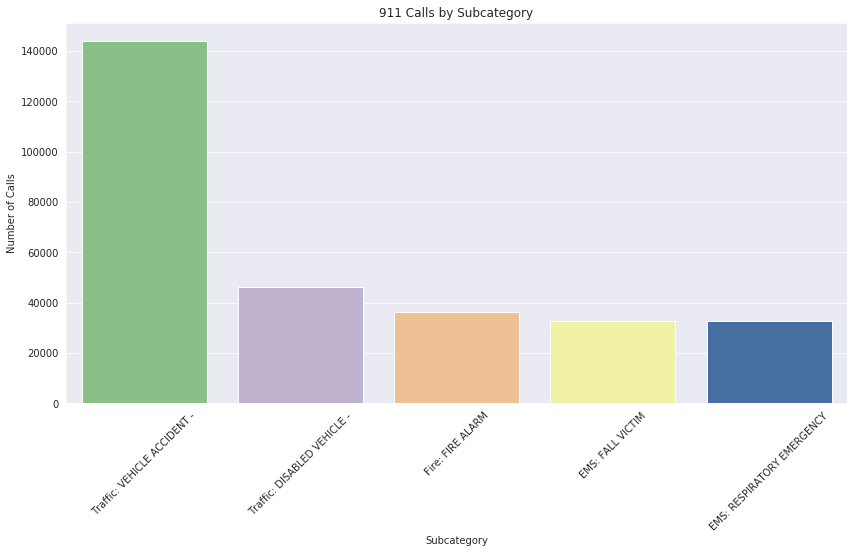

In [10]:
# The same can be done to see the subcategories with most calls
# In order not to lose the category information, we will use the title column

plt.figure(figsize=(14,7))

sns.countplot(x="title", data=df, palette='Accent', order=df['title'].value_counts().head().index)

plt.title('911 Calls by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

Text(0, 0.5, 'Subcategory')

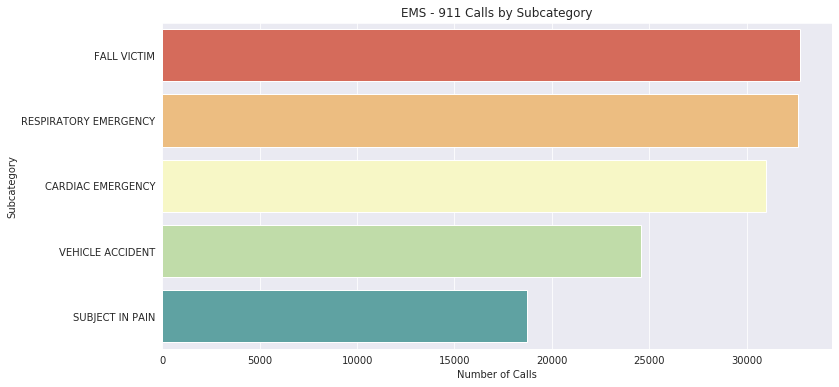

In [11]:
# Now, for example, let's explore the most representative subcategories in the EMS category
plt.figure(figsize=(12,6))

sns.barplot(x=df[df['Category'] == 'EMS']['Subcategory'].value_counts().head(), 
            y=df[df['Category'] == 'EMS']['Subcategory'].value_counts().head().index,
            data=df[df['Category'] == 'EMS'], palette='Spectral', orient='h')

plt.title('EMS - 911 Calls by Subcategory')
plt.xlabel('Number of Calls')
plt.ylabel('Subcategory')

From the information above, we can draw some conclusions:

- EMS (Emergency Medical Services) accounts for almost half the total of 911 calls in the period
- Vehicle accident is by far the most common 911 call reason
- Although fall victim ranks first in EMS call reasons, it only represents around 5% of total calls
- Fire alarm represents almost 40% of fire related 911 calls

In [12]:
# To explore the calls in the studied period, we will use the timeStamp column
# First, we have to convert the timeStamp column from string to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
# Now we can create four new columns to better explore the data
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Year'] = df['timeStamp'].apply(lambda x: x.strftime("%Y"))
df['Month'] = df['timeStamp'].apply(lambda x: x.strftime("%b"))
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.strftime("%a"))
df['Hour'] = df['timeStamp'].apply(lambda x: x.strftime("%H"))

In [14]:
# Let's see how the dataframe is now
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e Category         Subcategory        Date  \
0      REINDEER CT & DEAD END  1      EMS   BACK PAINS/INJURY  2015-12-10   
1  BRIAR PATH & WHITEMARSH LN  1      EMS  DIABETIC EMERGENCY  2015-12-10   
2                    HAWS AVE  1     Fire       GAS-ODOR/LEAK  2015-12-10   
3          AIRY ST & SWEDE ST  1      EMS   CARDIAC EMERGENCY  2015-12-10   
4    CHERRYWOOD CT & DEAD END  1      EMS           DIZZINESS  2015-12-10   

   Year Month Day of Week Hour  
0  2015   Dec         Thu   17  
1  2015   Dec         Thu   17  
2  2015   Dec         Thu   14  
3  2015   Dec         Thu   16  
4  2015   Dec         Thu   16

Text(0.5, 1, '911 Calls by Day of Week and Hour')

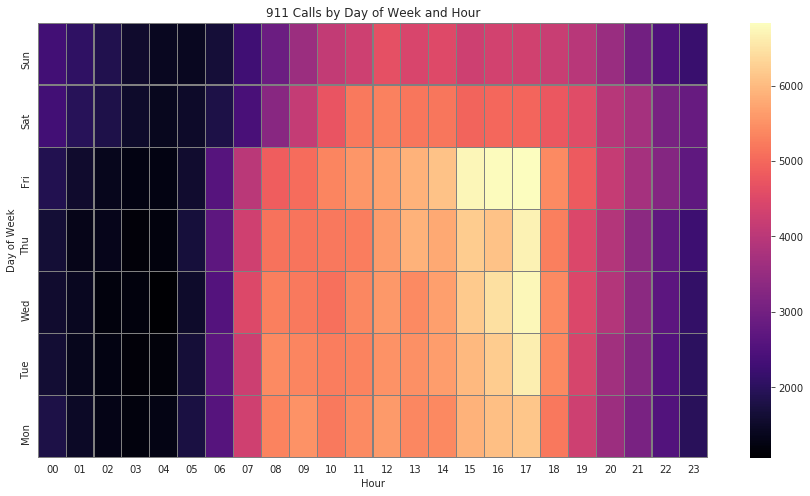

In [15]:
# Initially, we can plot a heatmap to see which hours of the day and days of the week the number of calls are higher
# Data for the plot
byDayHour = df.groupby(['Day of Week','Hour']).size().reset_index().rename(columns={0:'Number of Calls'})
byDayHour_df = pd.pivot_table(data=byDayHour,values='Number of Calls',index='Day of Week',columns='Hour',aggfunc='sum')
byDayHour_df.index = pd.CategoricalIndex(byDayHour_df.index, categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][::-1])
byDayHour_df.sort_index(level=0, inplace=True)

# Plot
plt.figure(figsize=(15,8))
sns.heatmap(data = byDayHour_df, cmap='magma', linecolor='grey', linewidth=0.2)
plt.title('911 Calls by Day of Week and Hour')

The plot above shows that the 911 calls occurs mostly from **8:00 to 18:00**, and decreases gradually as the night advances.

Text(0.5, 1.0, '911 Calls - Evolution')

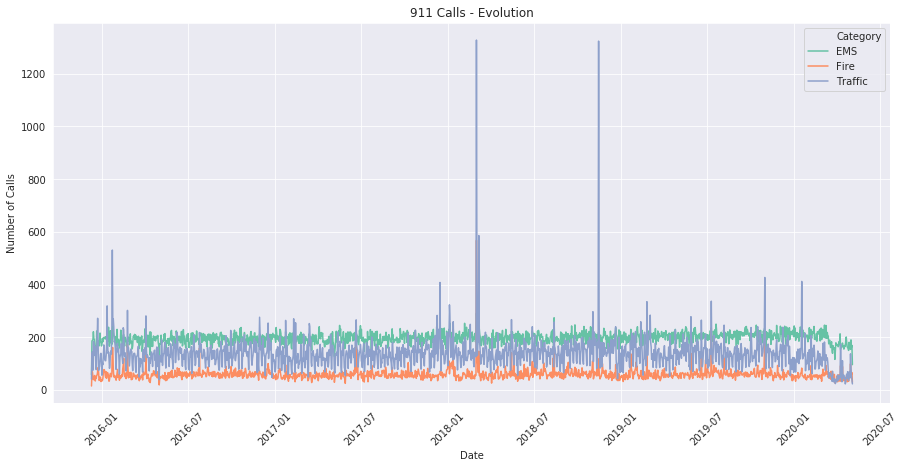

In [16]:
# In another analysis, we will plot a line plot containing the calls in the period, segregated by the category of the call
byDateCategory = df.groupby(['Date','Category']).size().reset_index().rename(columns={0:'Number of Calls'})

plt.figure(figsize=(15,7))

sns.lineplot(x='Date',y='Number of Calls',data=byDateCategory, hue='Category', palette='Set2')
plt.xticks(rotation=45)
plt.title('911 Calls - Evolution')

In [17]:
# Analyzing the plot above, we can clearly see several spikes in traffic related calls
# Let's see now the dates with higher occurrences and the exact number of calls
df[df['Category'] == 'Traffic'].groupby('Date').size().reset_index() \
                               .rename(columns={0:'Number of Calls'}) \
                               .sort_values('Number of Calls', ascending = False) \
                               .head(10)

Date  Number of Calls
813   2018-03-02             1328
1071  2018-11-15             1324
818   2018-03-07              586
44    2016-01-23              531
1422  2019-11-01              427
814   2018-03-03              417
1500  2020-01-18              412
736   2017-12-15              408
1309  2019-07-11              337
1173  2019-02-25              335

After a search on Google, we see that the cause for a high number of calls in **March 2nd, 2018** was a powerful **nor'easter (cyclone)** that impacted the region.

In [18]:
# Let's isolate the traffic category for better visualization and make the plot interactive using Plotly library
fig = px.line(byDateCategory[byDateCategory['Category'] == 'Traffic'], x="Date", y="Number of Calls",
              template='seaborn', title='Traffic Calls - Evolution')

fig.add_shape( # add a horizontal line, representing mean
    type="line", line_color="orange", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=byDateCategory['Number of Calls'].mean(),
    y1=byDateCategory['Number of Calls'].mean(), yref="y"
)

fig.add_annotation( # add a text for the nor'easter
    text="March 1-3, 2018 nor'easter", x='2018-03-02', y=1350, arrowhead=1, showarrow=True, arrowcolor='red' 
)

In [19]:
# March 1-3, 2018 Nor'easter

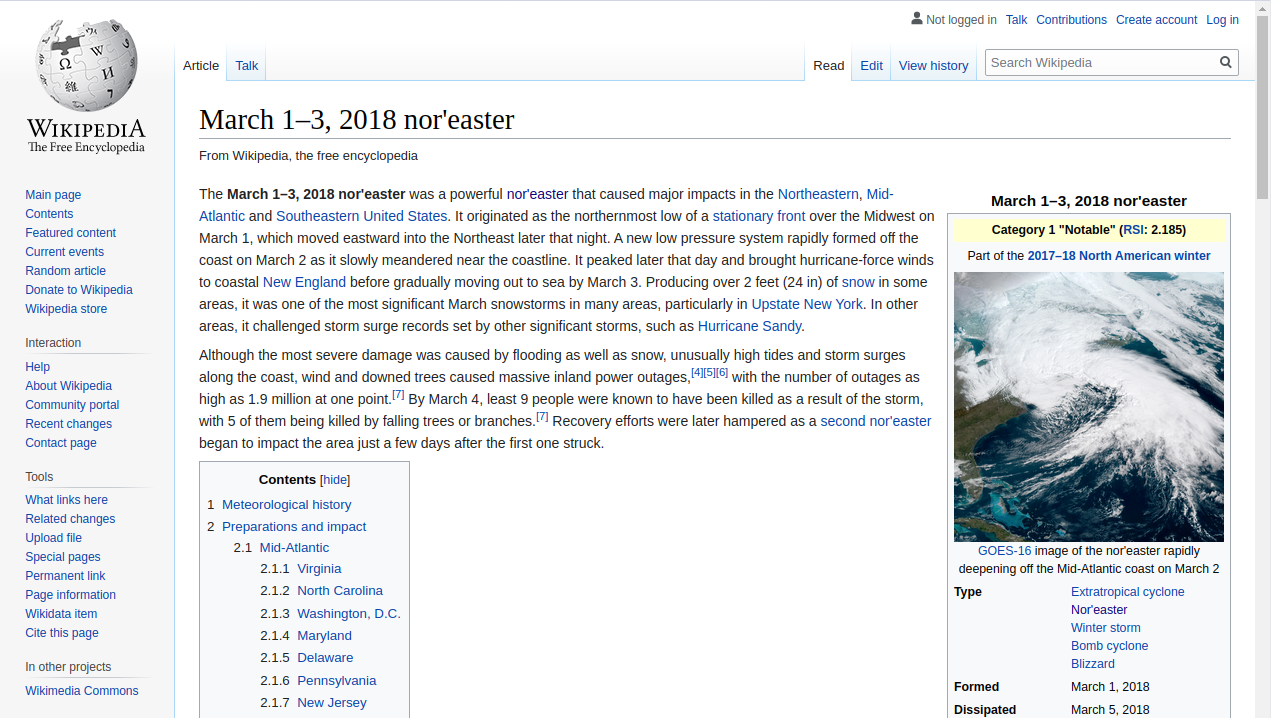

In [20]:
# Now let's see the 911 call subcategories in traffic in that day
df[(df['Category'] == 'Traffic') & (df['Date'].astype(str) == '2018-03-02')] \
  .groupby('Subcategory') \
  .size() \
  .reset_index() \
  .rename(columns={0:'Number of Calls'}) \
  .sort_values('Number of Calls', ascending = False) 

Subcategory  Number of Calls
2           ROAD OBSTRUCTION -              650
3           VEHICLE ACCIDENT -              430
0           DISABLED VEHICLE -              197
1  HAZARDOUS ROAD CONDITIONS -               49
4               VEHICLE FIRE -                2

We can see that almost half of calls that day had **road obstruction** as a reason. This makes sense since in a severe cyclone, down trees and power lines are usual.

Now we will explore the locations of the 911 calls represented in the dataset. For this task, we need a dataset/layer that represents the townships' boundaries. Luckily, we've found what we need in the [Mountgomery County website][1].

[1]: https://data-montcopa.opendata.arcgis.com/datasets/montgomery-county-municipal-boundaries

In [21]:
# Loading the geojson file containing the township boundaries with the geopandas library
montgomery_map = gpd.read_file('https://opendata.arcgis.com/datasets/74f1d8fde3204995916dc377e8db0dbc_0.geojson')

In [22]:
# Verifying the type of the object
type(montgomery_map)

geopandas.geodataframe.GeoDataFrame

In [23]:
# Viewing a sample of the dataset
montgomery_map.head()

OBJECTID        Name  Municipal_Number  PA_County_Code  PA_Municipal_Code  \
0         1    Abington                30              46                101   
1         2      Ambler                 1              46                401   
2         3  Bridgeport                 2              46                402   
3         4  Bryn Athyn                 3              46                403   
4         5  Cheltenham                31              46                102   

   FIPS_County_Code  FIPS_Municipal_Code Federal_ID_Number       GEOID  \
0                91                  156        23-6000025  4209100156   
1                91                 2264        23-6002836  4209102264   
2                91                 8568        23-6002838  4209108568   
3                91                 9696        23-6002840  4209109696   
4                91                12968        23-6004587  4209112968   

      Municipal_Class   Sq_Miles                          Web_URL  \
0  1st Class Township  15.498995          http://www.abington.org   
1             Borough   0.851034   http://www.boroughofambler.com   
2             Borough   0.698749  http://boroughofbridgeport.com/   
3             Borough   1.946052        http://brynathynboro.org/   
4  1st Class Township   9.026953   http://cheltenhamtownship.org/   

                                PennDOT_Official_Map   Shape__Area  \
0  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  4.320854e+08   
1  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  2.372537e+07   
2  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  1.947991e+07   
3  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  5.425261e+07   
4  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  2.516560e+08   

   Shape__Length                                           geometry  
0  111934.759052  POLYGON ((-75.07680 40.08702, -75.07782 40.085...  
1   21676.715164  POLYGON ((-75.21379 40.15197, -75.21431 40.151...  
2   20118.167655  POLYGON ((-75.35688 40.10413, -75.35551 40.104...  
3   64927.278871  POLYGON ((-75.04930 40.14388, -75.04716 40.142...  
4   74599.521678  POLYGON ((-75.11018 40.07693, -75.10857 40.076...

Now we have to verify if the townships available on this file are the ones we have on the 911 calls dataset.

In [24]:
# Verifying the difference between the townships in both datasets
set(montgomery_map['Name'].str.lower()) - set(df['twp'].str.lower())

{'hatfield twp'}

In [25]:
# Tranforming the Name column in the map dataframe to be equal the twp column in the df dataframe
# Aplying the title function (making the first letter in each word upper case)
df['twp'] = df['twp'].str.title()
# Correcting the difference in the writing of the Hatfield Township
montgomery_map['Name'].replace('Hatfield Twp','Hatfield Township',inplace=True)

Our purpose now is to enrich the map dataframe with the calls info from the 911 dataset. With the conclusion of the previous steps, we can use the columns that represent the township in both datasets as a key to join them.

In [26]:
# Creating a dataframe containing the 911 calls by township
calls_df = df['twp'].value_counts().reset_index().rename(columns={'index':'Township','twp':'Number of Calls'})
calls_df.head()

Township  Number of Calls
0  Lower Merion            53240
1      Abington            38208
2    Norristown            35678
3  Upper Merion            34531
4    Cheltenham            29234

In [27]:
# Merging the calls_df dataframe with the montgomery_map dataframe
merged_df = pd.merge(montgomery_map, calls_df, how='left', left_on='Name', right_on='Township')
merged_df.head()

OBJECTID        Name  Municipal_Number  PA_County_Code  PA_Municipal_Code  \
0         1    Abington                30              46                101   
1         2      Ambler                 1              46                401   
2         3  Bridgeport                 2              46                402   
3         4  Bryn Athyn                 3              46                403   
4         5  Cheltenham                31              46                102   

   FIPS_County_Code  FIPS_Municipal_Code Federal_ID_Number       GEOID  \
0                91                  156        23-6000025  4209100156   
1                91                 2264        23-6002836  4209102264   
2                91                 8568        23-6002838  4209108568   
3                91                 9696        23-6002840  4209109696   
4                91                12968        23-6004587  4209112968   

      Municipal_Class   Sq_Miles                          Web_URL  \
0  1st Class Township  15.498995          http://www.abington.org   
1             Borough   0.851034   http://www.boroughofambler.com   
2             Borough   0.698749  http://boroughofbridgeport.com/   
3             Borough   1.946052        http://brynathynboro.org/   
4  1st Class Township   9.026953   http://cheltenhamtownship.org/   

                                PennDOT_Official_Map   Shape__Area  \
0  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  4.320854e+08   
1  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  2.372537e+07   
2  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  1.947991e+07   
3  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  5.425261e+07   
4  http://www.dot7.state.pa.us/BPR_pdf_files/Maps...  2.516560e+08   

   Shape__Length                                           geometry  \
0  111934.759052  POLYGON ((-75.07680 40.08702, -75.07782 40.085...   
1   21676.715164  POLYGON ((-75.21379 40.15197, -75.21431 40.151...   
2   20118.167655  POLYGON ((-75.35688 40.10413, -75.35551 40.104...   
3   64927.278871  POLYGON ((-75.04930 40.14388, -75.04716 40.142...   
4   74599.521678  POLYGON ((-75.11018 40.07693, -75.10857 40.076...   

     Township  Number of Calls  
0    Abington            38208  
1      Ambler             4246  
2  Bridgeport             3529  
3  Bryn Athyn             1189  
4  Cheltenham            29234

In [28]:
# Now, we can use the folium library to plot an interactive choropleth map
# Setting the coordinates for the map
folium_map = folium.Map(location=[40.2, -75.4], zoom_start=10)

# Creating the choropleth layer
choropleth = folium.Choropleth(merged_df, data=merged_df,
                  key_on='feature.properties.Township',
                  columns=['Township', 'Number of Calls'], 
                  fill_color='Reds', fill_opacity = 0.7,
                  line_opacity=0.3, highlight=True,
                  name='Montgomery County', legend_name='Number of Calls',).add_to(folium_map)

# Adding the layer to the map
folium.LayerControl().add_to(folium_map)

# Adding the tooltip to the map
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['Township','Number of Calls'])
)

# Displaying the map
folium_map

From the map above, we can see that the townships with most calls are **Lower Merion (53240)**, **Abington (38208)** and **Norristown (35678)**. Now, let's dig deeper into the Lower Merion township by plotting a heatmap with the lat and lng info we have. 

In [29]:
# Creating a basemap centered in the Lower Merion Township region
basemap = folium.Map(location=[40.0250, -75.2850], zoom_start=12)

# Creating lists with lat and lng data points
lat = df[df['twp'] == 'Lower Merion'].lat.tolist()
lng = df[df['twp'] == 'Lower Merion'].lng.tolist()

# Adding the heatmap layer
HeatMap(list(zip(lat, lng)),radius=10,).add_to(basemap)

# Plotting the map
basemap